###  Chunk 1: Import Required Libraries


In [108]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [128]:
#know version of all libraries

import sklearn
import sys

print(f'Python Version: {sys.version}')
print(f'Numpy Version: {np.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Seaborn Version: {sns.__version__}')
print(f'Matplotlib Version: {plt.matplotlib.__version__}')
print(f'Scikit-Learn Version: {sklearn.__version__}')

Python Version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Scikit-Learn Version: 1.5.2


### Chunk 2: Load the Dataset


In [109]:
# Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
column_names = [f"feature_{i}" for i in range(60)] + ["target"]
df = pd.read_csv(url, header=None, names=column_names)

# Display the First 5 Rows
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.0200     0.0371     0.0428     0.0207     0.0954     0.0986   
1     0.0453     0.0523     0.0843     0.0689     0.1183     0.2583   
2     0.0262     0.0582     0.1099     0.1083     0.0974     0.2280   
3     0.0100     0.0171     0.0623     0.0205     0.0205     0.0368   
4     0.0762     0.0666     0.0481     0.0394     0.0590     0.0649   

   feature_6  feature_7  feature_8  feature_9  ...  feature_51  feature_52  \
0     0.1539     0.1601     0.3109     0.2111  ...      0.0027      0.0065   
1     0.2156     0.3481     0.3337     0.2872  ...      0.0084      0.0089   
2     0.2431     0.3771     0.5598     0.6194  ...      0.0232      0.0166   
3     0.1098     0.1276     0.0598     0.1264  ...      0.0121      0.0036   
4     0.1209     0.2467     0.3564     0.4459  ...      0.0031      0.0054   

   feature_53  feature_54  feature_55  feature_56  feature_57  feature_58  

### Chunk 3: Dataset Information


In [110]:
# Dataset Information
print("\nDataset Information:")
print(df.info())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   208 non-null    float64
 1   feature_1   208 non-null    float64
 2   feature_2   208 non-null    float64
 3   feature_3   208 non-null    float64
 4   feature_4   208 non-null    float64
 5   feature_5   208 non-null    float64
 6   feature_6   208 non-null    float64
 7   feature_7   208 non-null    float64
 8   feature_8   208 non-null    float64
 9   feature_9   208 non-null    float64
 10  feature_10  208 non-null    float64
 11  feature_11  208 non-null    float64
 12  feature_12  208 non-null    float64
 13  feature_13  208 non-null    float64
 14  feature_14  208 non-null    float64
 15  feature_15  208 non-null    float64
 16  feature_16  208 non-null    float64
 17  feature_17  208 non-null    float64
 18  feature_18  208 non-null    float64
 19  feature

### Chunk 4: Exploratory Data Analysis (EDA)



Target Distribution:
target
M    111
R     97
Name: count, dtype: int64


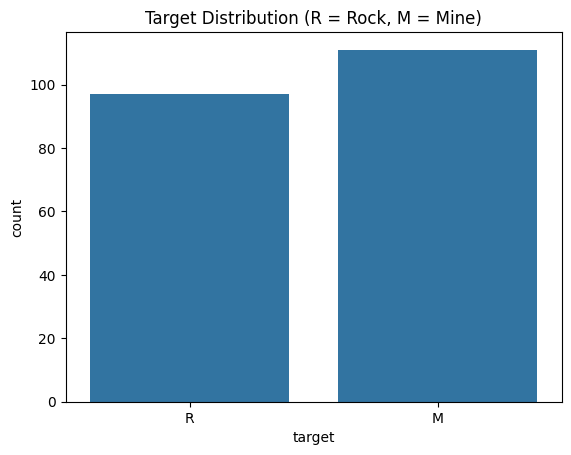

In [112]:
# Target Distribution
print("\nTarget Distribution:")
print(df["target"].value_counts())

# Visualize Target Distribution
sns.countplot(x="target", data=df)
plt.title("Target Distribution (R = Rock, M = Mine)")
plt.show()



### Chunk 5: Data Preprocessing


In [113]:
 # Encode Target Variable
df["target"] = df["target"].map({"R": 0, "M": 1})

# Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Chunk 6: Model Training and Evaluation


In [115]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the Model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluation Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

# Logistic Regression
print("\nLogistic Regression:")
log_reg = LogisticRegression()
evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)


Logistic Regression:
Training Accuracy: 0.9337
Testing Accuracy: 0.8095

Confusion Matrix:
[[14  2]
 [ 6 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.91      0.77      0.83        26

    accuracy                           0.81        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.83      0.81      0.81        42



### Chunk 7: Support Vector Machine (SVM)


In [117]:
# Support Vector Machine (SVM)
print("\nSupport Vector Machine:")
svm = SVC()
evaluate_model(svm,X_train_scaled, X_test_scaled, y_train, y_test)


Support Vector Machine:
Training Accuracy: 0.9819
Testing Accuracy: 0.8810

Confusion Matrix:
[[15  1]
 [ 4 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.85      0.90        26

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



### Chunk 8: Decision Tree


In [119]:
# Decision Tree
print("\nDecision Tree:")
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test)


Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.7143

Confusion Matrix:
[[11  5]
 [ 7 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.79      0.73      0.76        26

    accuracy                           0.71        42
   macro avg       0.70      0.71      0.70        42
weighted avg       0.72      0.71      0.72        42



Chunk 9: Random Forest


In [120]:
# Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)


Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8571

Confusion Matrix:
[[14  2]
 [ 4 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.85      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



### Chunk 10: Hyperparameter Tuning (Random Forest Example)


In [121]:
# Hyperparameter Tuning (Random Forest Example)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(grid_search.best_params_)

# Evaluate the Best Model
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, X_test, y_train, y_test)


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy: 1.0000
Testing Accuracy: 0.8095

Confusion Matrix:
[[13  3]
 [ 5 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.88      0.81      0.84        26

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42



### Chunk 11: Save the Model (Optional)


In [ ]:
# Save the Model (Optional)
import joblib
joblib.dump(best_rf, "sonar_rf_model.pkl")

# Load the Model (Optional)
# loaded_model = joblib.load("sonar_rf_model.pkl")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   208 non-null    float64
 1   feature_1   208 non-null    float64
 2   feature_2   208 non-null    float64
 3   feature_3   208 non-null    float64
 4   feature_4   208 non-null    float64
 5   feature_5   208 non-null    float64
 6   feature_6   208 non-null    float64
 7   feature_7   208 non-null    float64
 8   feature_8   208 non-null    float64
 9   feature_9   208 non-null    float64
 10  feature_10  208 non-null    float64
 11  feature_11  208 non-null    float64
 12  feature_12  208 non-null    float64
 13  feature_13  208 non-null    float64
 14  feature_14  208 non-null    float64
 15  feature_15  208 non-null    float64
 16  feature_16  208 non-null    float64
 17  feature_17  208 non-null    float64
 18  feature_18  208 non-null    float64
 19  feature_19  208 non-null    f

In [74]:
df.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
             ..
feature_56    0
feature_57    0
feature_58    0
feature_59    0
target        0
Length: 61, dtype: int64

In [75]:
df['target'].value_counts() 

target
M    111
R     97
Name: count, dtype: int64

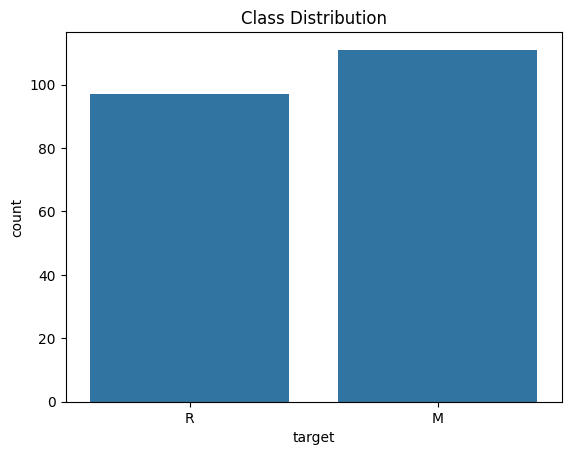

In [76]:
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

In [77]:
df['target']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: target, Length: 208, dtype: object

In [78]:
df['target']=df['target'].map({'R':0,'M':1})

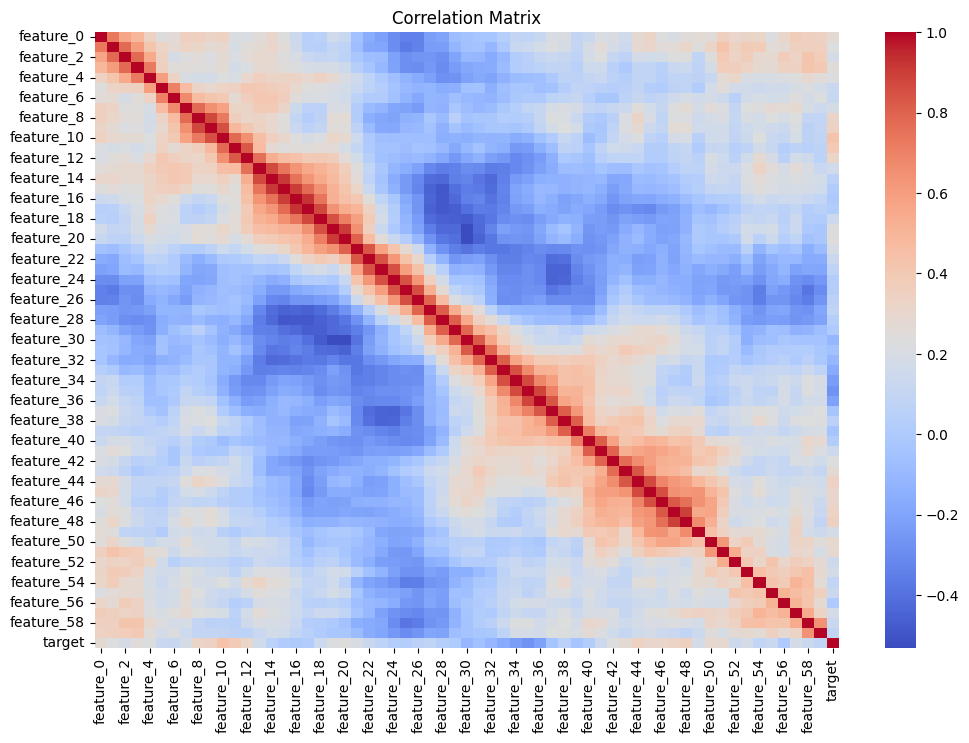

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: target, Length: 208, dtype: int64

In [81]:

X=df.drop('target',axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)

(166, 60)


In [82]:
#check if y contain nan values
print(y_train.isnull().sum())


0


In [89]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: target, Length: 208, dtype: int64

In [84]:
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [85]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Traininig Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    



In [91]:
print("Logistic Regression Model:")
log_reg = LogisticRegression()
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)


Logistic Regression Model:
Traininig Accuracy: 0.9337
Test Accuracy: 0.8095

Confusion Matrix:
[[14  2]
 [ 6 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.91      0.77      0.83        26

    accuracy                           0.81        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.83      0.81      0.81        42



In [94]:
# Support Vector Machine (SVM)
print("\nSupport Vector Machine:")
svm = SVC()
evaluate_model(svm, X_train_scaled,   y_train,X_test_scaled ,y_test)


Support Vector Machine:
Traininig Accuracy: 0.9819
Test Accuracy: 0.8810

Confusion Matrix:
[[15  1]
 [ 4 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.85      0.90        26

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



In [100]:
# Decision Tree
print("\nDecision Tree:")
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train_scaled,   y_train,X_test_scaled ,y_test)


Decision Tree:
Traininig Accuracy: 1.0000
Test Accuracy: 0.7143

Confusion Matrix:
[[11  5]
 [ 7 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.79      0.73      0.76        26

    accuracy                           0.71        42
   macro avg       0.70      0.71      0.70        42
weighted avg       0.72      0.71      0.72        42



In [102]:
# Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train_scaled,   y_train,X_test_scaled ,y_test)


Random Forest:
Traininig Accuracy: 1.0000
Test Accuracy: 0.8571

Confusion Matrix:
[[14  2]
 [ 4 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.85      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [103]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}  

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
print("\nRandom Forest:")
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train_scaled, y_train, X_test_scaled, y_test)

Best Parameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score:  0.8251336898395722

Random Forest:
Traininig Accuracy: 1.0000
Test Accuracy: 0.8095

Confusion Matrix:
[[13  3]
 [ 5 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.88      0.81      0.84        26

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42

